# Introduction to neural nets

The goal of this activity is explore how neural nets are used, relying on the fairly simple resources available through `sklearn`. 

This activity is adapted from M&uuml;ller and Guido, *Introduction to Machine Learning with Python*, pg 106-118. 
As in certain previous labs, the code is drawn from what is available from the GitHub
repositories supporting 
[the M&uuml;ller and Guido book](https://github.com/amueller/mglearn/tree/master/mglearn).

## 1. Some data

We start by grabbing some toy data which we'll use for a classification problem. In this case we'll use artificial data that doesn't have any particular real-world meaning. The `sklearn` library has a function to generate data with two attributes plus a discrete target such that the plot of the data points makes two interlocking semicircles or "moons". The point is that this makes a difficult classification problem since the data points are very much not linearly separable.

Let's generate some data and see what it looks like.

In [1]:
from sklearn.datasets import make_moons
import mglearn  # package to accompany the Muller and Guido book
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, 'Feature 1')

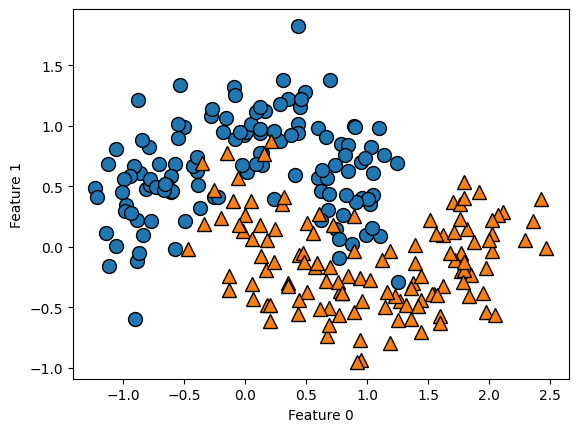

In [2]:
# You can control the number of samples and how jumbled the data is.
# By setting a "random state", you make the pseudo-random results reproducible.
X,y = make_moons(n_samples=250, noise=0.25, random_state=3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let's separate this in to training and test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

Then let's view the resulting training and test data separately.

Text(0, 0.5, 'Feature 1')

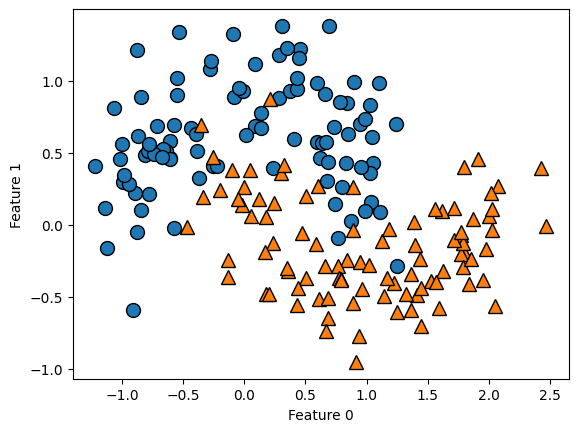

In [4]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

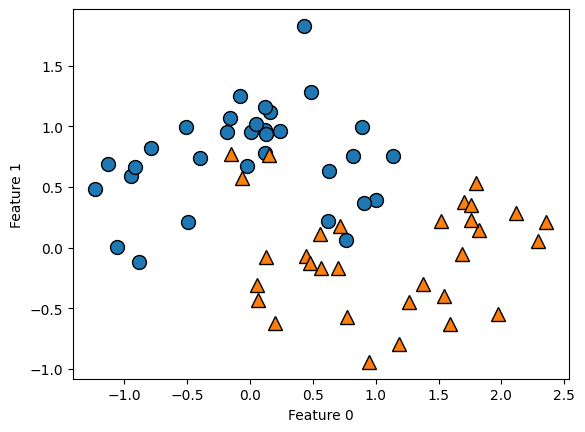

In [5]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 2. For comparison: KNN, Logistic Regression, and SVM

How well do the other classifiers we've seen do on this problem? Let's train a classifier from each of KNN, LogReg, and SVM, visualize their results, and compute their accuracy. (You can refer to the sklearn documentation as necessary to refersh your memory on how these classes work. Feel free to fiddle with the parameters to see if you can eke out better performance.)

In [6]:
# This function displays contour plots and accuracy for both training and test set.
def display_contour_and_accuracy(clsfr, X_train, y_train, X_test, y_test) :
    fig, axes = plt.subplots(1, 2, figsize = (12,4))
    mglearn.plots.plot_2d_separator(clsfr, X_train, fill=True, alpha=.3, ax=axes[0])
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0])
    axes[0].set_title("Training set")
    mglearn.plots.plot_2d_separator(clsfr, X_test, fill=True, alpha=.3, ax=axes[1])
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, ax=axes[1])
    axes[1].set_title("Test set")
    print("Training set score: {:.2f}".format(clsfr.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(clsfr.score(X_test, y_test)))


Training set score: 0.94
Test set score: 0.94


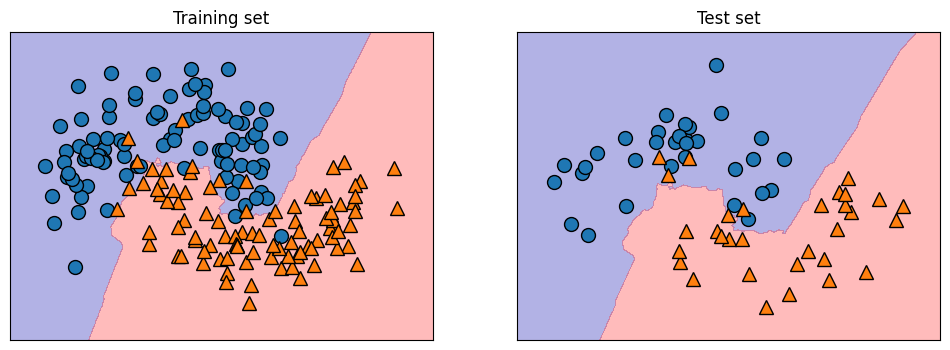

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
display_contour_and_accuracy(knn, X_train, y_train, X_test, y_test)



Training set score: 0.87
Test set score: 0.89


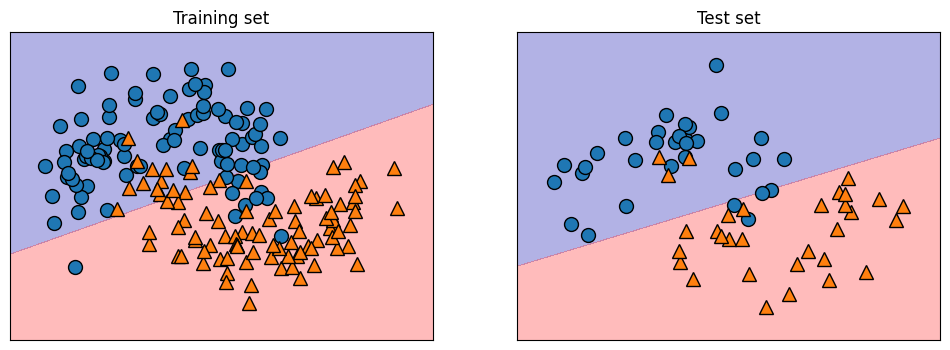

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
display_contour_and_accuracy(logreg, X_train, y_train, X_test, y_test)

Training set score: 0.84
Test set score: 0.89


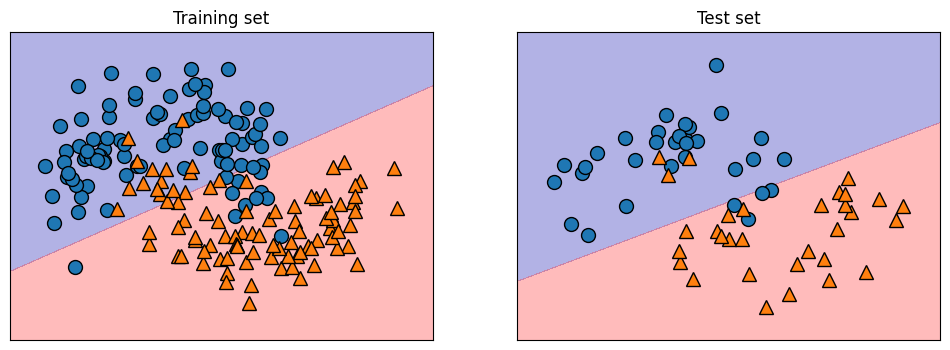

In [9]:
# Support vector machines
from sklearn.svm import SVC

# With a "linear" kernel, which amounts to being un-kernelized
# Low C: Prefer bigger margin over fewer training errors
svm = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
display_contour_and_accuracy(svm, X_train, y_train, X_test, y_test)

Training set score: 0.86
Test set score: 0.92


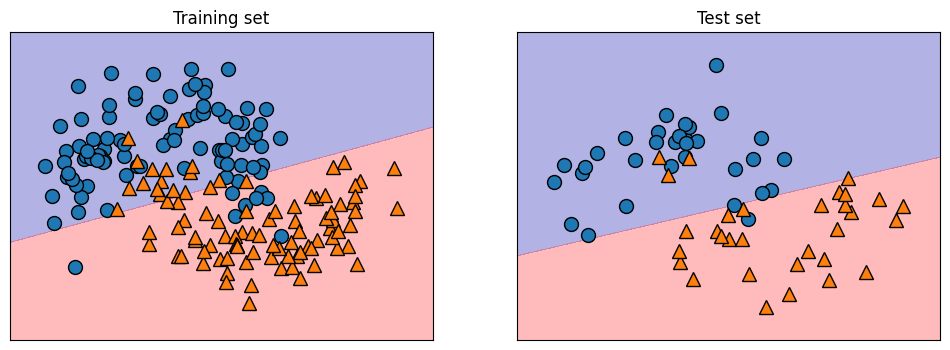

In [10]:
# Support vector machines
from sklearn.svm import SVC

# With a "linear" kernel, which amounts to being un-kernelized
# High C: Prefer fewer training errors over bigger margin
svm = SVC(kernel='linear', C=100.0).fit(X_train, y_train)
display_contour_and_accuracy(svm, X_train, y_train, X_test, y_test)

Training set score: 0.89
Test set score: 0.92


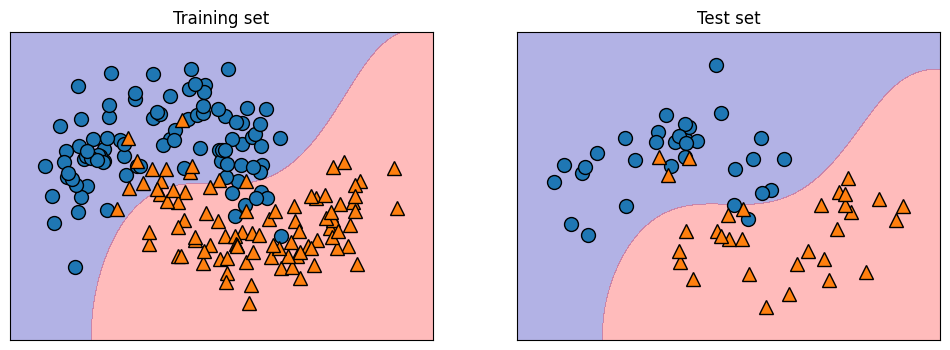

In [11]:
# Kernelized, low C: Prefer bigger margin over fewer training errors
svm = SVC(C=0.1).fit(X_train, y_train)
display_contour_and_accuracy(svm, X_train, y_train, X_test, y_test)

Training set score: 0.95
Test set score: 0.94


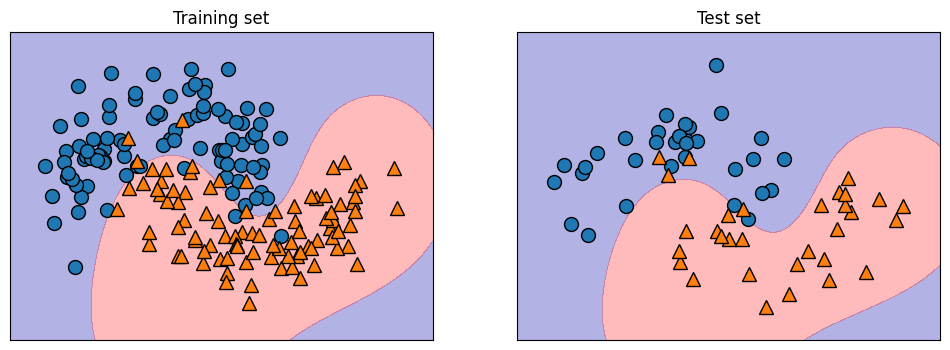

In [12]:
# Kernelized, high C: Prefer fewer training errors over bigger margin
svm = SVC(C=100.0).fit(X_train, y_train)
display_contour_and_accuracy(svm, X_train, y_train, X_test, y_test)

Note that kernelized SVM with a high C is hard to beat.

(As a McDonald's fountain drink, Hi-C Orange is hard to beat.)

## 3. Training a neural net

Now let's see how a multi-layer perceptron classifier from `sklearn` does when used with the default settings.

In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)

/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Okay, we get a `ConvergenceWarning`, but let's live with it for now. We can plot the classifier to see how it separates the plane. In this plot we show the training points again, but color two regions in the plane where the classifier would find new data points to be in one class or the other.

Training set score: 0.87
Test set score: 0.92


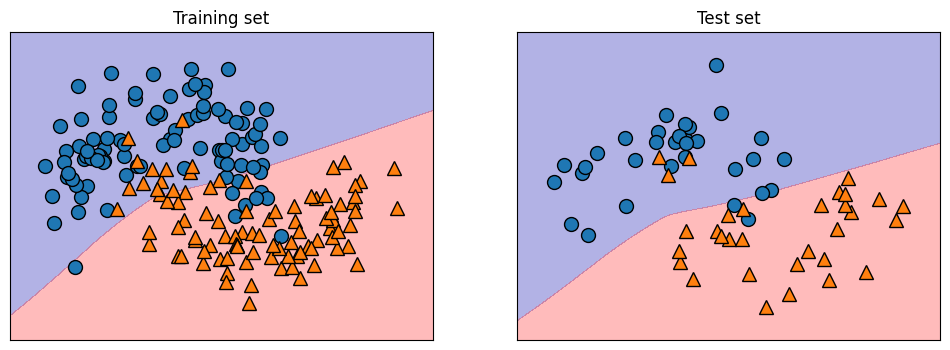

In [14]:
display_contour_and_accuracy(mlp, X_train, y_train, X_test, y_test)

How does that place among our previous classifiers?


Now let's take a look at the parameters 
[as documented in the API](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
Notice that the default *solver* (that is, training algorithm)
is something called `adam`
(introduced in [this paper](https://arxiv.org/abs/1412.6980))
which the documentation says "works pretty well on relatively large datasets'.
Our dataset is small.

The other parameter to take note of immeidately is 
`hidden_layer_sizes`. This is a tuple whose length is the number
of layers of hidden units, with each component
indicating the number of units in the respective layers.
Apparently the default is one layer with 100 units, which
also seems tuned to large data sets.
Let's see what happens when we adjust both of those.

The documentation says that the `lbfgs` solver 
"can converge faster and perform better" on smaller data sets.
(That's the *limited-memory Broyden-Fletcher-Goldfarb-Shanno* solver.)
Let's try that one, and also reduce the number of
hidden units to 10.

Training set score: 0.93
Test set score: 0.90


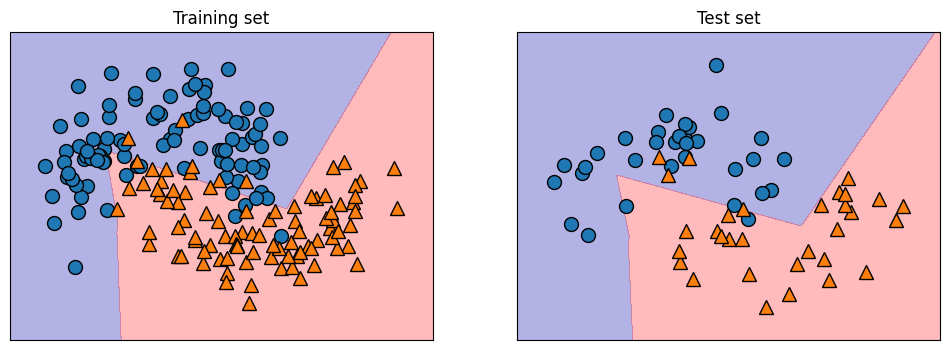

In [15]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=(10,)).fit(X_train, y_train)
display_contour_and_accuracy(mlp, X_train, y_train, X_test, y_test)

Another variable we can fiddle with is the activation function. Notice (again, from the `MLPClassifier` documentation) that the default activation function is something called `relu`, which refers to the *rectified linear unit function*, also known simply as the *rectifier*. 
This function returns 0 for any input less than or
equal to 0, but acts as the identity for positive input.
Compare it to the "adjusted" hyperbolic tangent and the logistic sigmoid:

Text(0, 0.5, 'relu(x), sigmoid(x), tanh(x)')

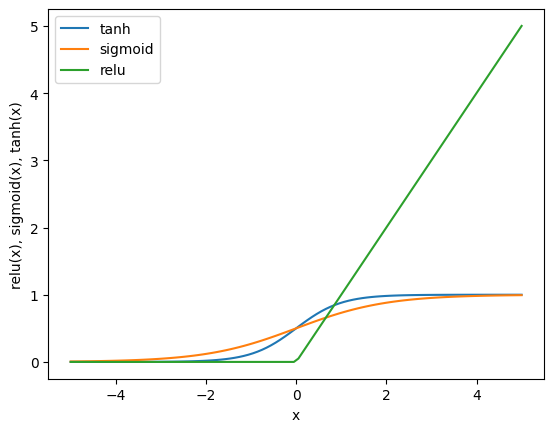

In [16]:
import numpy as np

# "adjusted" so that it maps to [0,1] instead of [-1, 1]
def tanh_adjusted(x) :
    return .5 * (1 + np.tanh(x))

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

line = np.linspace(-5, 5, 100)
plt.plot(line, tanh_adjusted(line), label="tanh")
plt.plot(line, sigmoid(line), label="sigmoid")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), sigmoid(x), tanh(x)")

I'm still figuring out what the advantages and disadvantages are of the various choices
for activation.
Relu seems to have the same disadvantage as a step function in that it is not differentiable
at 0.
But one thing it's straighforward to see is that tanh or sigmoid will give a smoother boundary between regions:

/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set score: 0.98
Test set score: 0.86


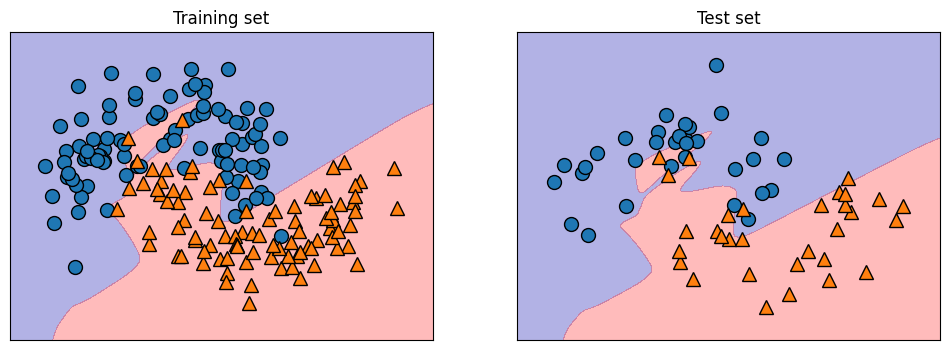

In [54]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10, 10, 10], activation='logistic').fit(X_train, y_train)
display_contour_and_accuracy(mlp, X_train, y_train, X_test, y_test)

Experiment for yourself for a while. Although there is a long list of parameters available to `MLPClassifier`, I recommend sticking with the ones we've talked about so far and also the parameter `alpha`, which controls the regularization penalty, and `max_iter`. For `hidden_layer_sizes`, you can try adding extra layers. But don't adjust several parameters haphazardly in the same experiment. Pick one thing at a time to vary (solver, number of hidden units, number of layers, alpha value) so you can isolate the effect. 

/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set score: 0.94
Test set score: 0.90


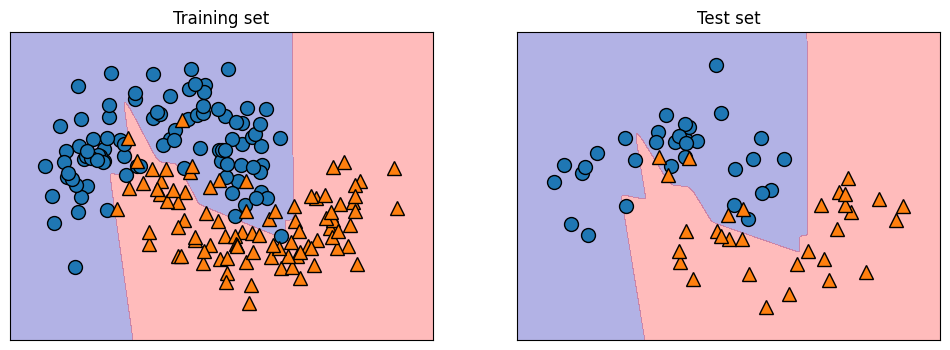

In [55]:
# Here is the code from the previous cell again for you to experiment with
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10], activation='tanh').fit(X_train, y_train)
display_contour_and_accuracy(mlp, X_train, y_train, X_test, y_test)


After you have done your own experiment, consider this one that M&uuml;ller and Guido do. Using the `lbfgs` solver, two layers of hidden units, and varying among 10 vs 100 units per layer and various values for alpha:

/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

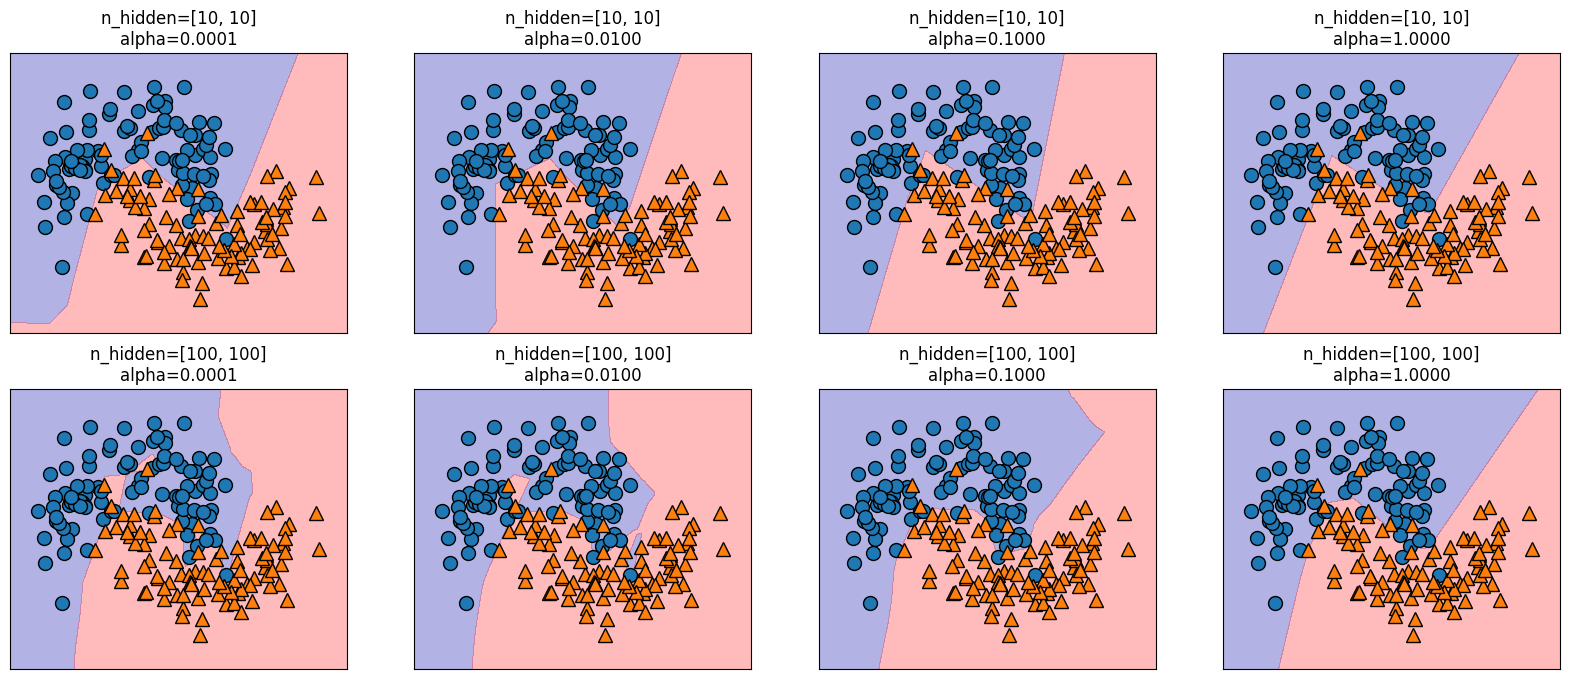

In [56]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

We also can consider the affect of the initial weights of the parameters. These are generated pseudo-randomly, but with a random process started by the random seed given by the parameter `random_state`. Since we're always giving the same seed, we'll get the same results in the preceding code we run it again. But what if we hold other parameters constant and adjust the seed?

/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/penv/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

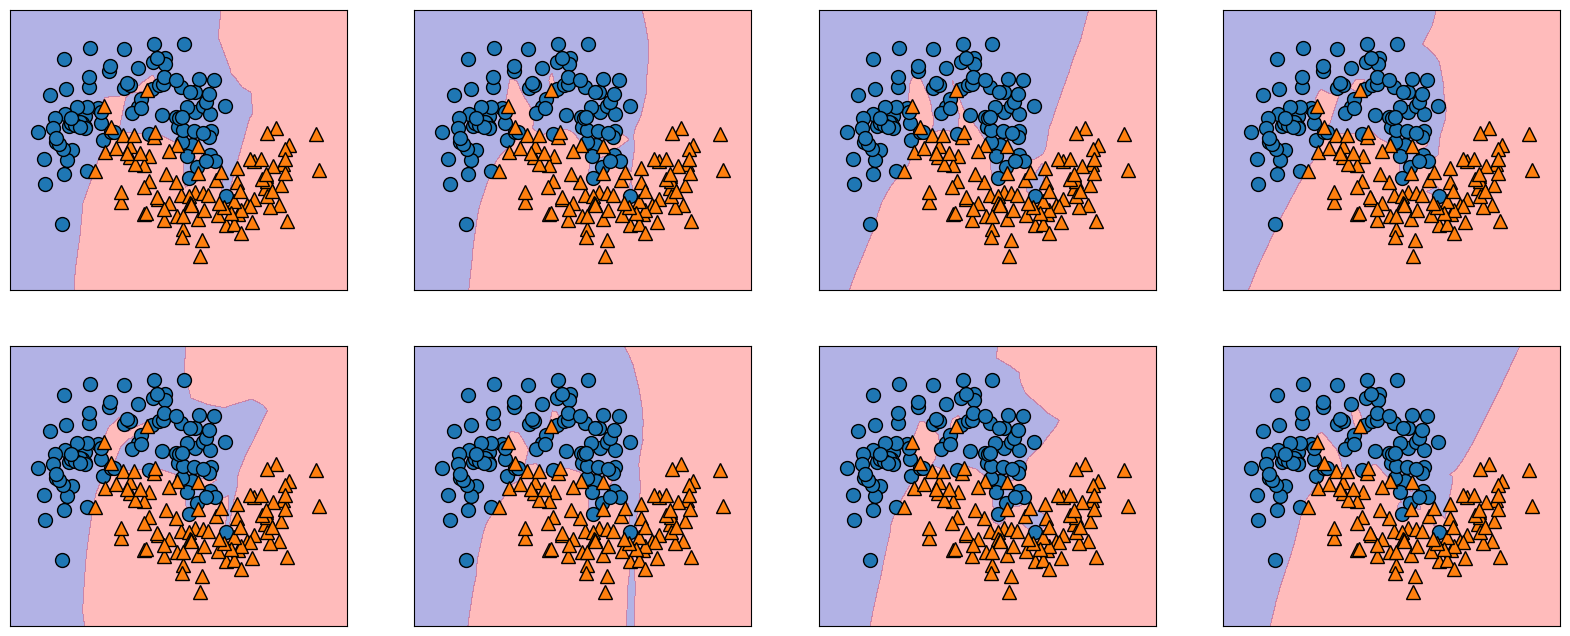

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

## 4. Real-world data: the Breast Cancer data set

Let's see how MLP does on real-world data. In the description of the breast cancer dataset, note that the various measurements have very different ranges. 

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# For review
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Now let's see how an MLP classifier does on this data, starting with the default parameters.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


That doesn't seem so bad, but it's well worth asking whether we can do better. 
One factor, besides algorithm parameters, that affects performance is the fact, noted above, the input features vary in different ways. 
We can adjust them so that they all have mean 0 and standard deviation 1 by taking each reading and subtracting the mean of that attribute from it and then dividing by that attribute's standard deviation.

In [60]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train


Since this data set is larger, we'll use the default `adam` solver, but increase the
maximum number of iterations (remembering the `ConvergenceWarning` we got last time we used it.

In [61]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Can you do any better by adjusting other parameters?

## 5. Visualizing an MLP

The following is a "color bar" chart that shows the weights for each input feature for each hidden unit (100, in one layer) in the classifier we just trained. 

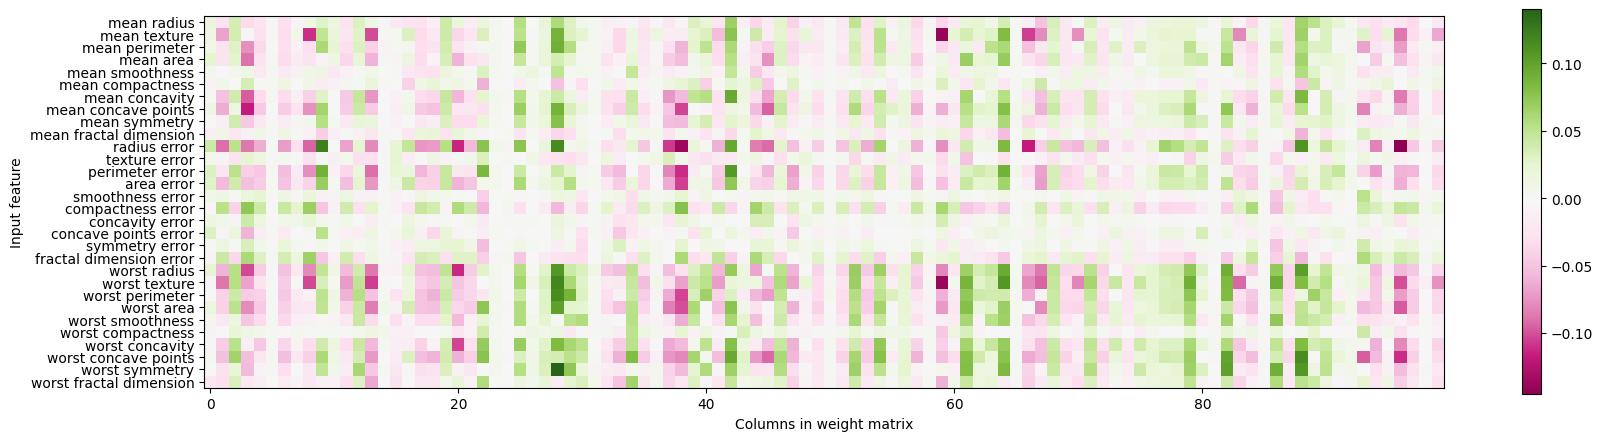

In [72]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='PiYG') # other cmap options are viridis, plasma, inferno, magma
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

M&uuml;ller and Guido describe this heat map this way (pg 118-119):

> This plot shows the weights that were learned connecting the input to the first 
> hidden layer. The rows in this plot correspond to the 30 input features,
> while the columns correspond to the 100 hidden units. Light colors represent large
> positive values, while dark colors represent negative values.
>
> One possible inference we can make is that features that have very small weights for all
> of the hidden units are "less important" to the model. We can see that "mean smoothness"
> and "mean compactness," in addition to the features found between "smoothness error"
> and "fractal dimension error," have relatively low weights compared to other features.
> This could mean that these are less important features or 
> possible that we didn't represent them in a way that the neural network could use.

But how much is the visual interpretation based on the color scheme? Go back and make the same heat map, but with a different setting for `cmap`.

And then go back to the cell earlier where `mlp` is trained and pick a different value for `alpha` (the default value for `alpha` is 0.0001).

## 6. Your turn

With what time you have left, try out MLP classification on your data set for your semester project (if appropriate) or a data set of your choice.

In [79]:
import pandas as pd
df = pd.read_csv('Landslide-Data.csv')

In [80]:
df

,landslide_category,landslide_size,fatality_count,event_date,landslide_trigger,landslide_setting,country_name,country_code,admin_division_population,longitude,latitude
0,landslide,large,11.0,8/1/2008 0:00,rain,mine,China,CN,0.0,107.450000,32.562500
1,mudslide,small,0.0,1/2/2009 2:00,downpour,unknown,United States,US,36619.0,-122.663000,45.420000
2,landslide,large,10.0,1/19/2007 0:00,downpour,unknown,Peru,PE,14708.0,-75.358700,-11.129500
3,landslide,medium,1.0,7/31/2009 0:00,monsoon,unknown,Nepal,NP,20908.0,81.708000,28.837800
4,landslide,medium,0.0,10/16/2010 12:00,tropical_cyclone,unknown,Philippines,PH,798634.0,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...
11028,landslide,medium,27.0,4/1/2017 13:34,rain,natural_slope,NaN,NaN,NaN,111.679944,-7.853409
11029,landslide,small,2.0,3/25/2017 17:32,other,natural_slope,NaN,NaN,NaN,75.680611,33.403080
11030,landslide,small,1.0,12/15/2016 5:00,unknown,urban,NaN,NaN,NaN,91.772042,26.181606
11031,translational_slide,large,24.0,4/29/2017 19:03,downpour,natural_slope,NaN,NaN,NaN,73.472379,40.886395


In [87]:
print(df['landslide_category'].cat.codes

SyntaxError: unexpected EOF while parsing (3056508307.py, line 1)

In [85]:
print(df[][5])

NameError: name 'dr' is not defined